# Import libraries


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Data Info


## Columns

*   p1_lvl - Expression levels of P1 in each cell (in arbitrary units)
*   p2_lvl - Expression levels of P2 in each cell (in arbitrary units)
*   cell_area - Size of the molecule
*   maj-axis - major axis length of each cell (approximating the shape of the cell cross-section to be elliptical)
*   min_axis - minor axis length of each cell
*   condition - Experimental Condition
*   replication - Repitition count under each condition








## Conditions


*   e0x - Normal setup (WT) without any modifications
*   e1x - The expression levels of the protein P1 were reduced while keeping that of P2 intact
*   e2x - The expression levels of the protein P2 were reduced while keeping that of P1 intact
*   e3x - The expression levels of the protein P1 were increased while keeping that of P2 intact
*   e4x - The expression levels of the protein P2 were increased while keeping that of P1 intact




> x = 1, 2, 3 depending on the number of repetition



---

In entire  code,


*   e0 contains data of e01,e02,e03
*   e1 contains data of e11,e12,e13
*   e1 contains data of e21,e22,e23
*   e1 contains data of e31,e32,e33
*   e1 contains data of e41,e42,e43


---


















# Convert dat files to Dataframe

In [ ]:
def read_data_file(path,condition, replication):
    """Reads data file based on condition, replications and returns a DataFrame

    Args:
      condition: Experimental condition.
      replication: Replication number.

    Returns: DataFrame containing the data from input file.
    """

    file_path = f'{path}{condition}{replication}.dat' # Data file path
    data=[i.strip().split() for i in open(file_path).readlines()] # splits the data based on spaces and them as nested lists

    # Create DataFrame
    df=pd.DataFrame(data,columns=columns)

    # Append condition and replicaton value to respective data
    df['condition'] = condition
    df['replication'] = replication

    return df

In [ ]:
columns=['p1_lvl','p2_lvl','cell_area','maj_axis','min_axis'] # Column Names
conditions = ['e0', 'e1', 'e2', 'e3', 'e4'] # Various Conditions
replications = ['1', '2', '3'] # Value representing number of replications

path="/content/drive/MyDrive/Data/Q1DataSets/Q1DataSet2/" # Replace it with your File path
file_lst=os.listdir(path) # Returns list of all files in the respective directory
file_lst.sort() # Sort the list values

# Create a list of DataFrames, one for each condition and replication
df = pd.concat([read_data_file(path, c, r) for c in conditions for r in replications])

df.to_csv("DataSet2.csv",index=False)


# Import DataFrame

In [ ]:
df=pd.read_csv('DataSet2.csv') # This dataframe includes all the 15 .dat file combined together
df

,p1_lvl,p2_lvl,cell_area,maj_axis,min_axis,condition,replication
0,285.79645,318.38006,88.48058,9.73106,3.09819,e0,1
1,228.01462,316.57763,95.36651,10.02494,3.14376,e0,1
2,331.06314,352.47901,95.07759,10.57045,3.02686,e0,1
3,368.32333,345.23546,57.87355,8.17404,2.39859,e0,1
4,318.78085,348.54889,69.52686,9.03779,2.62459,e0,1
...,...,...,...,...,...,...,...
2953,247.09355,508.81594,75.22882,11.25593,2.23617,e4,3
2954,235.05288,506.63546,41.92317,8.41123,1.69518,e4,3
2955,240.23013,483.13104,24.83344,6.33961,1.37994,e4,3
2956,297.61694,490.77206,43.88618,8.48084,1.78321,e4,3


# 1. Data Analysis

**Important terminology**

*   distplot  : It is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis.
*   heatmap : It provide an immediate visual summary of information across two axes, allowing users to quickly grasp the most important or relevant data points
*   jointplot : It is a Python graph that visualizes the relationship between two variables.
*   correlation : Relation between attribute to every other attribute . It varies from -1 to 1 . Better the value better the relation .
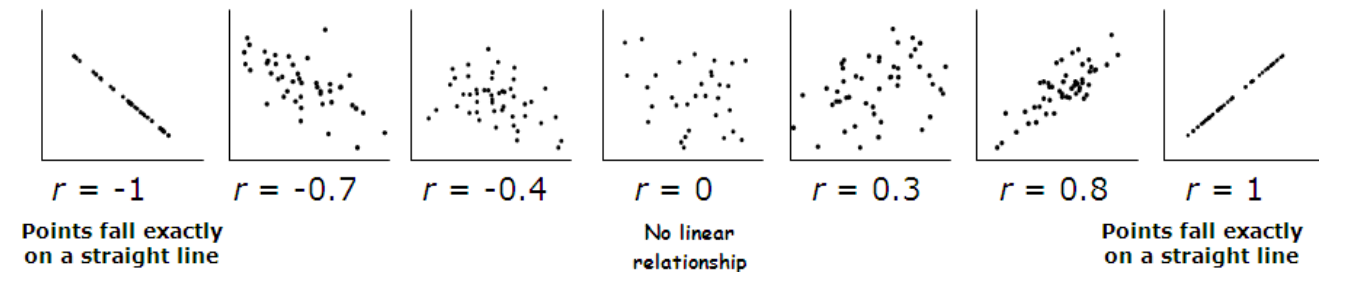





<ipython-input-39-de1c6d2e9e1f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['p1_lvl'],kde=True,hist=True,rug=True,label="p1")
<ipython-input-39-de1c6d2e9e1f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['p2_lvl'],kde=True,hist=True,rug=False,label="p2")


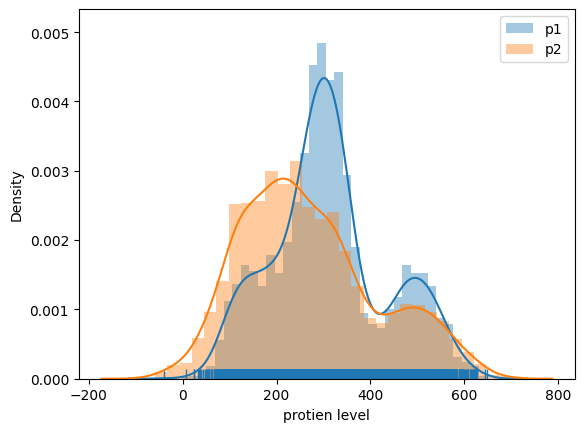

In [ ]:
## Distribution plot for p1 and p2 for all the 15 .dat file combined together

f, ax = plt.subplots(1, 1)

# Plot the distribution of the 'p1_lvl' column with a histogram, kernel density estimate (KDE), and rug plot
sns.distplot(df['p1_lvl'],kde=True,hist=True,rug=True,label="p1")

# Plot the distribution of the 'p2_lvl' column with a histogram and KDE, but without a rug plot
sns.distplot(df['p2_lvl'],kde=True,hist=True,rug=False,label="p2")
plt.xlabel("protien level")

ax.legend()

plt.show() # Display plot

<ipython-input-40-91cfcd2df138>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


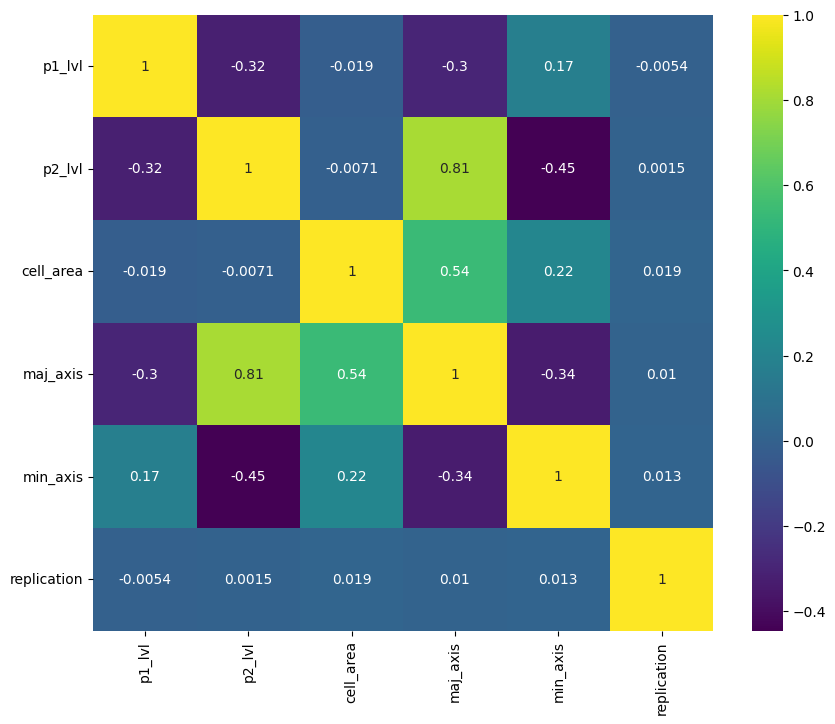

In [ ]:
## heatmap for whole data (all 15 appended datasets) to have broader picture on how data is correlated.

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'viridis')

# Set the figure size
fig=plt.gcf()
fig.set_size_inches(10,8)

plt.show() # Display plot

**Inference :**
-->Here if we observe on whole data together, p1 and p2 are having near to zero corelation on cell area(size).

-->p1 having impact on major & min axis.

-->P2 is having high corelation and major axis & mid negative correlation on minor axis .


<ipython-input-41-521392304fce>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.condition==i].corr(), annot=True, cmap = 'viridis')


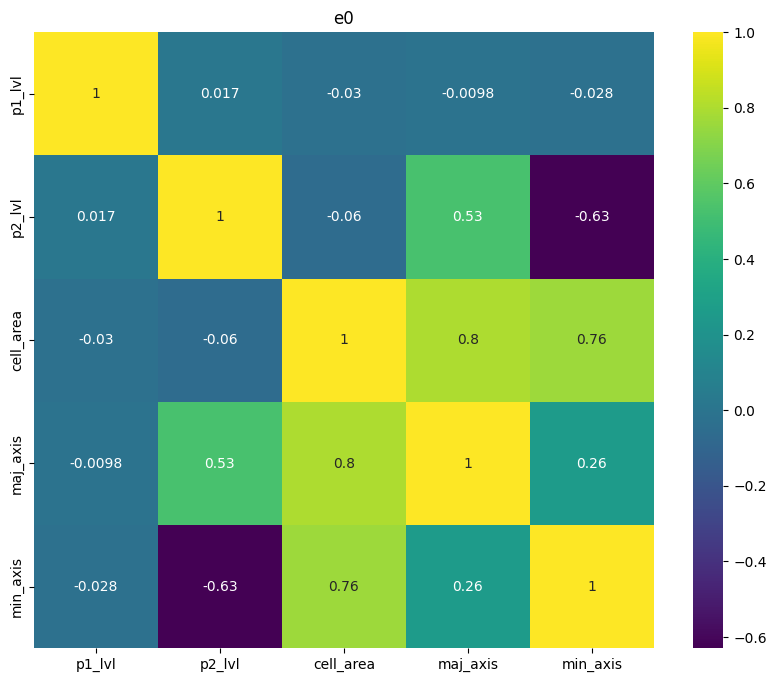

<ipython-input-41-521392304fce>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.condition==i].corr(), annot=True, cmap = 'viridis')


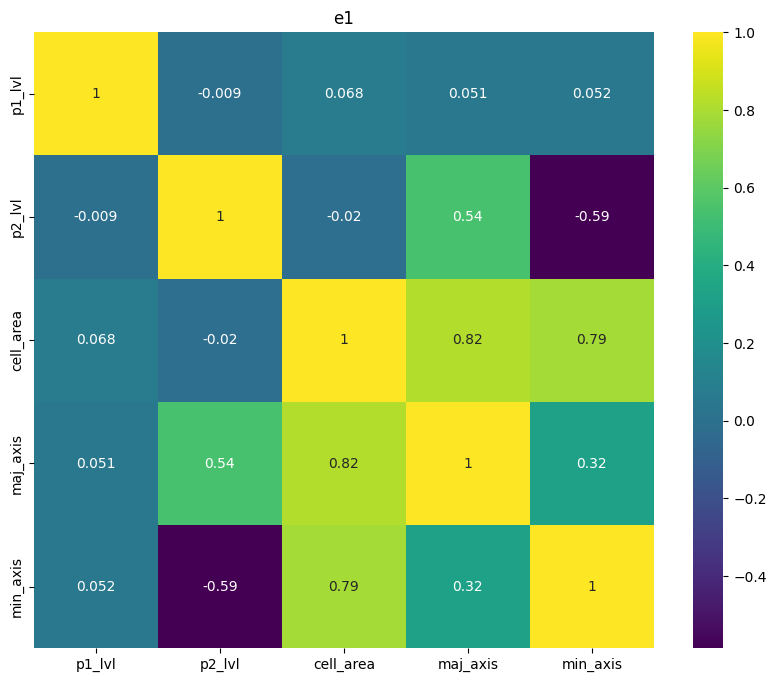

<ipython-input-41-521392304fce>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.condition==i].corr(), annot=True, cmap = 'viridis')


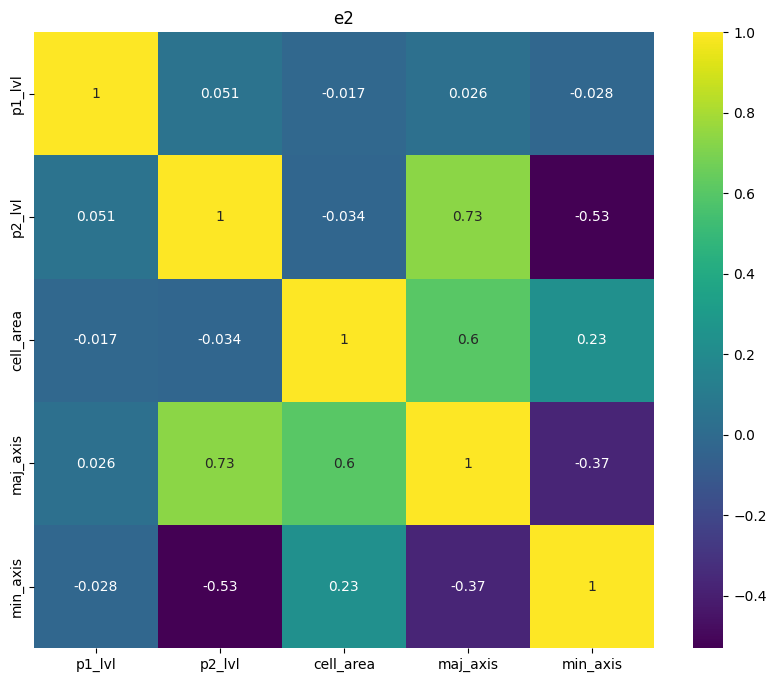

<ipython-input-41-521392304fce>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.condition==i].corr(), annot=True, cmap = 'viridis')


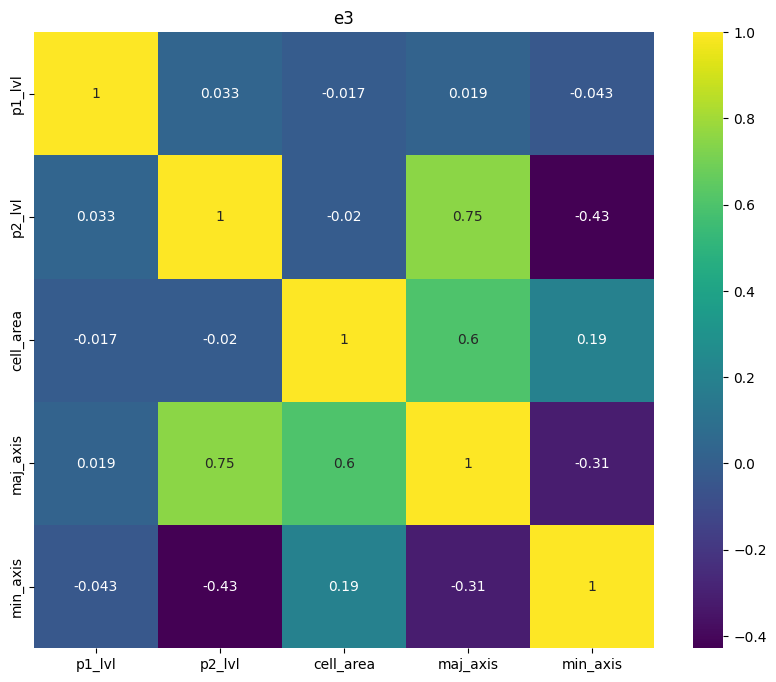

<ipython-input-41-521392304fce>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.condition==i].corr(), annot=True, cmap = 'viridis')


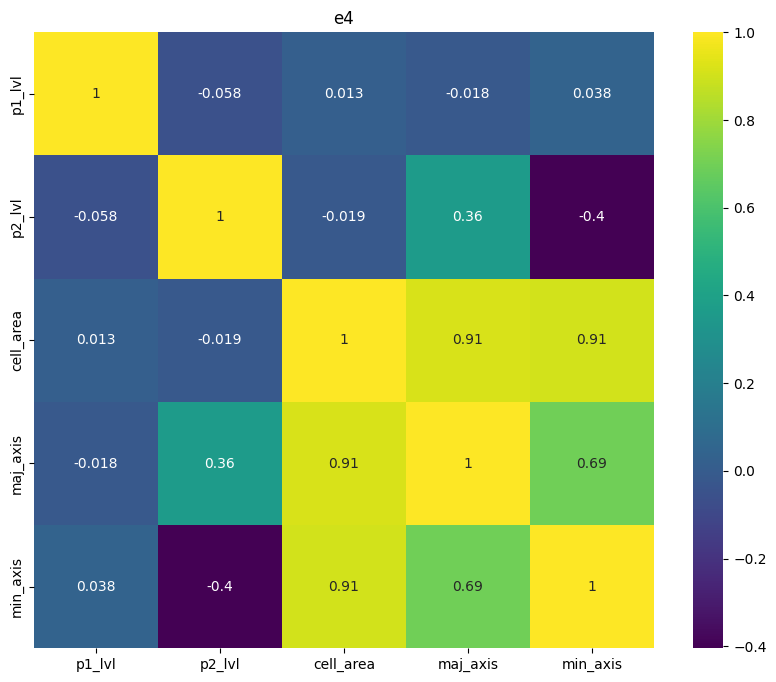

In [ ]:
## correlation under each condition

# Iterate over the unique experimental conditions
for i in df["condition"].value_counts()[df.condition.unique()].keys():
  # Drop replication column
  df1=df.drop(["replication"],axis=1)

  # Compute the correlation matrix and plot correlaton Heatmap
  sns.heatmap(df1[df1.condition==i].corr(), annot=True, cmap = 'viridis')

  # Set the figure size and title
  fig=plt.gcf()
  fig.set_size_inches(10,8)
  plt.title(i)

  plt.show() # Display plot


**Inference :**

As we have 5 different experimental conditions, we'll be analyzing data with each condition using heatmap.
overall, impact of p1 & p2 on cell area has no change and is similar across all conditions. Simillarly impact of p1 on major & minor axis follows the same. Also p2 impact on minor axis hasn't make much changes.

Changes have been seen in p2 impact on major axis . We'll see impact in each condition :

e0,e1,e4 - Here it is around mid positive corelation

e2,e3 - It's showing high correlation in these two conditions i.e., when p2 is reduced keeping p1 intact or increasing p1 keeping p2 intact.

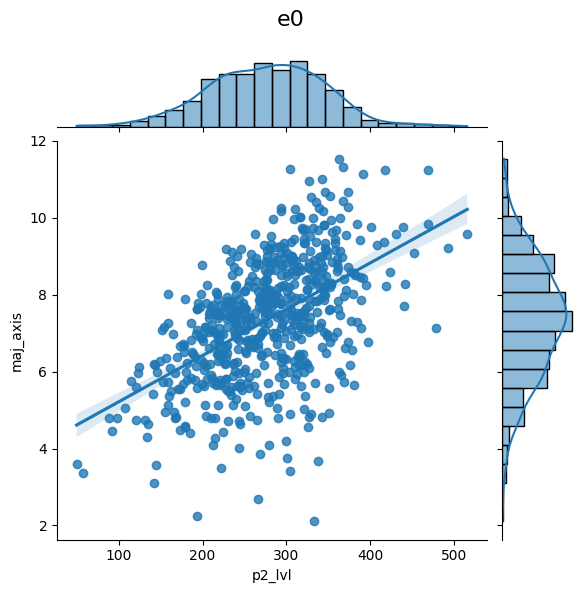

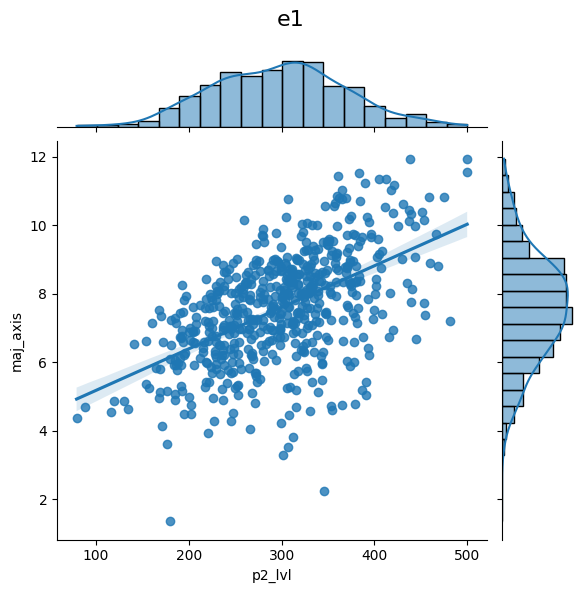

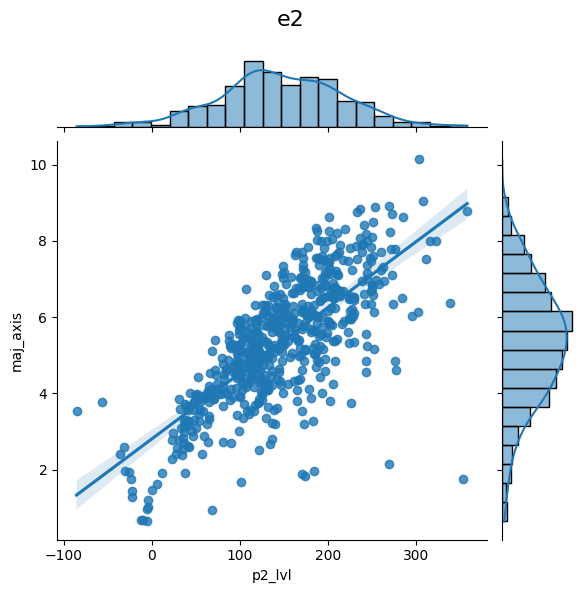

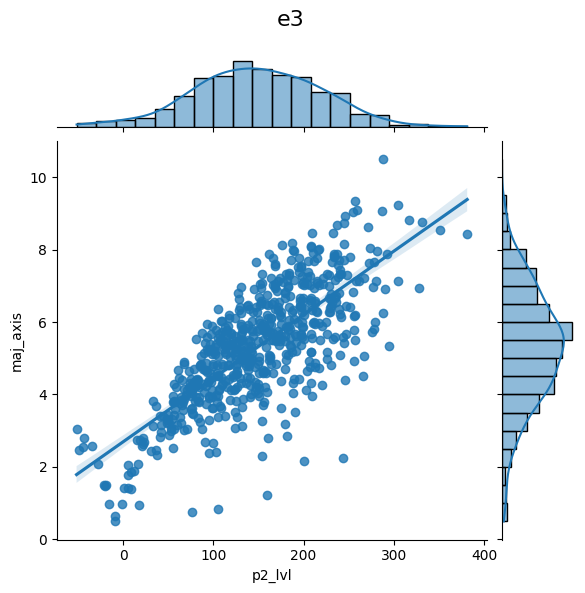

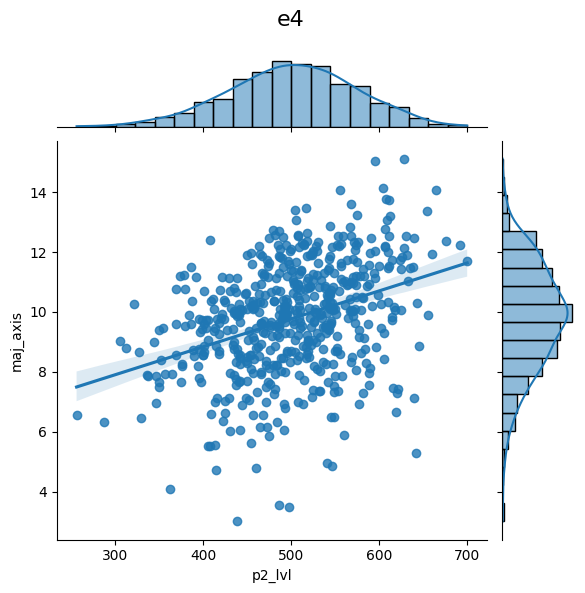

In [ ]:
## p2 impact on major axis on each experimental condition (e0,e1,e2,e3,e4)

# Iterate over the unique experimental conditions
for i in df["condition"].value_counts()[df.condition.unique()].keys():

  # Create a joint plot for the current condition
  sns.jointplot(x='p2_lvl',y='maj_axis',data=df[df.condition==i],kind='reg')

  # Adjust the subplots and add centred title
  plt.subplots_adjust(top=0.9)
  plt.suptitle(i, fontsize = 16)


**Inference :**

This is just a graphical represntation of correlation value we saw in heatmap. Here we considered p2 impact on major axis under each condition.

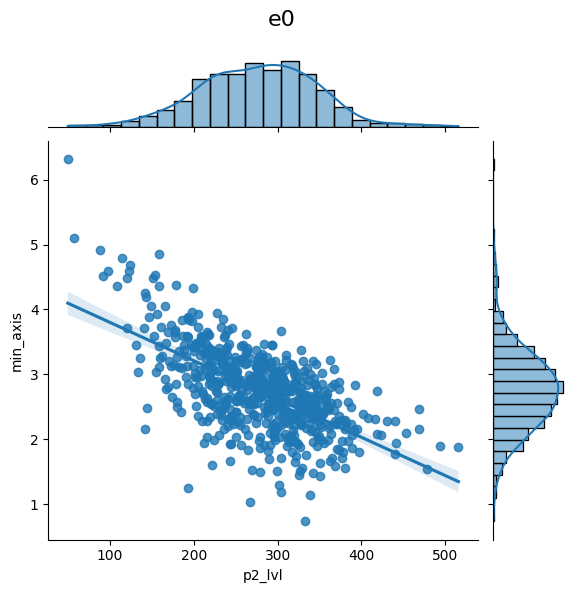

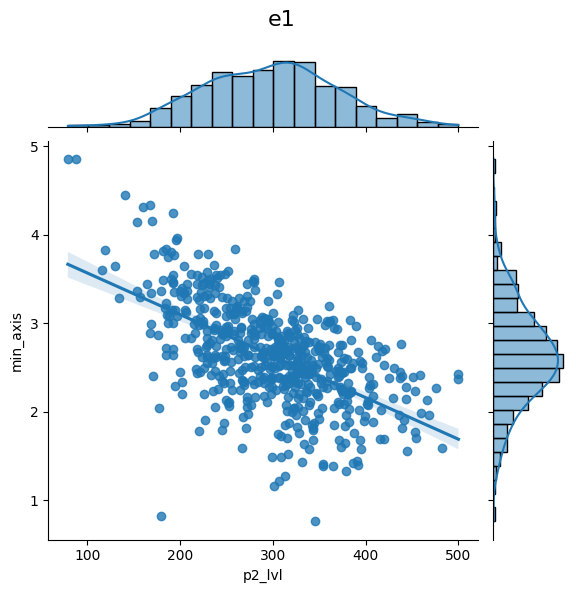

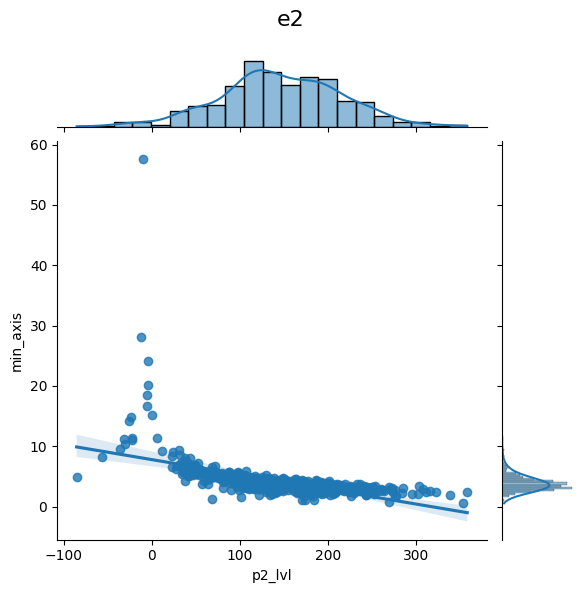

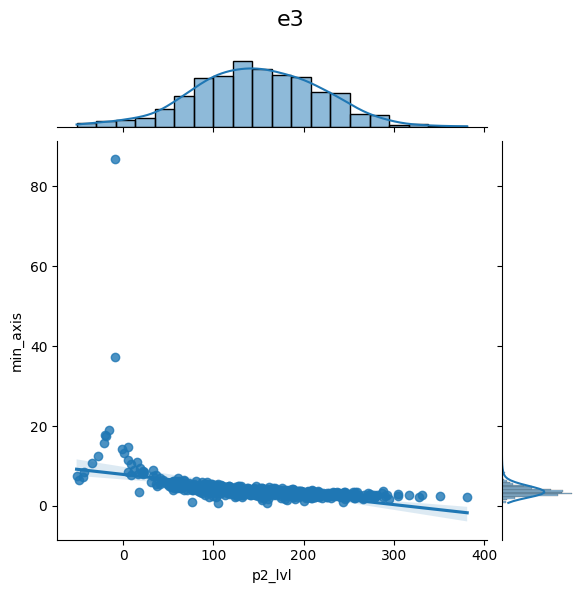

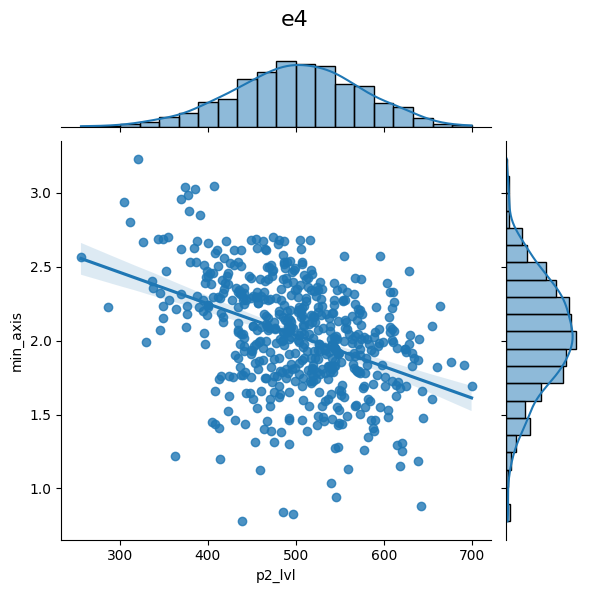

In [ ]:
## p2 impact on minor axis on each experimental condition (e0,e1,e2,e3,e4)

# Iterate over the unique experimental conditions
for i in df["condition"].value_counts()[df.condition.unique()].keys():

  # Create a joint plot for the current condition
  sns.jointplot(x='p2_lvl',y='min_axis',data=df[df.condition==i],kind='reg')

  # Adjust the subplots and add centred title
  plt.subplots_adjust(top=0.9)
  plt.suptitle(i, fontsize = 16)


**Inference :**

This is just a graphical represntation of correlation value we saw in heatmap. Here we considered p2 impact on minor axis under each condition.

<ipython-input-44-40905197934d>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.replication==i].corr(), annot=True, cmap = 'viridis')


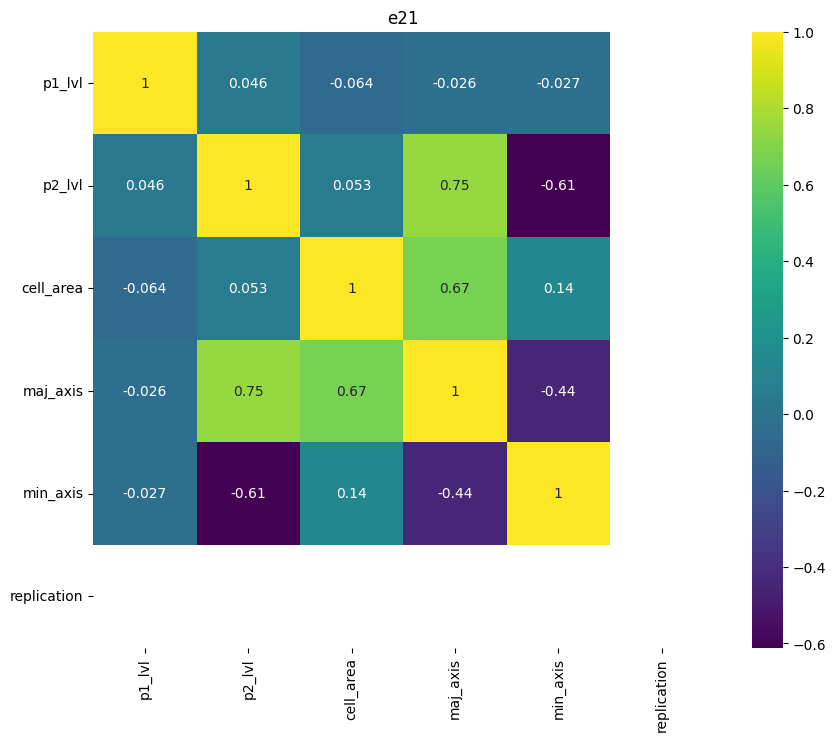

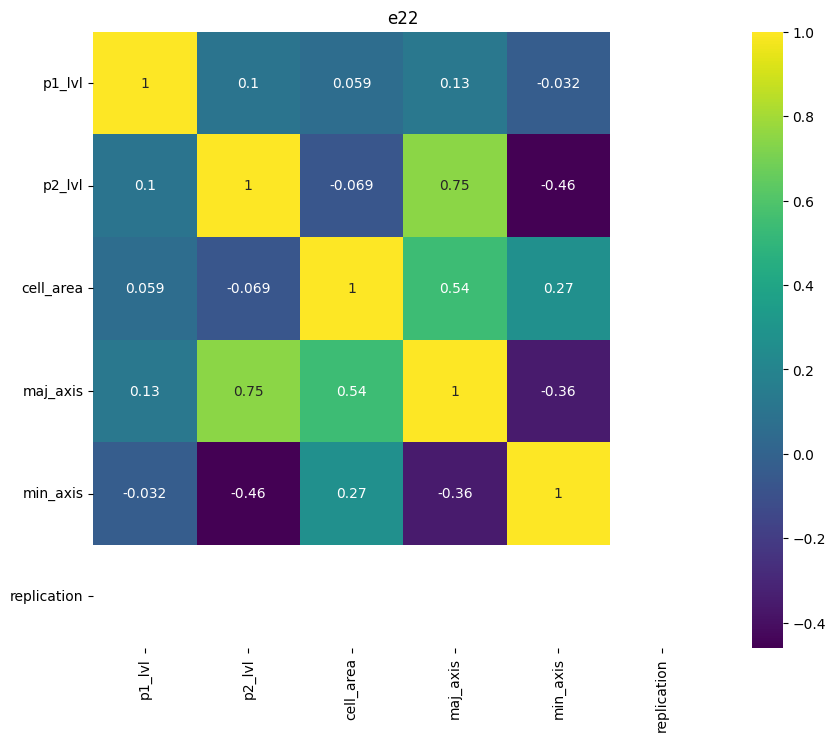

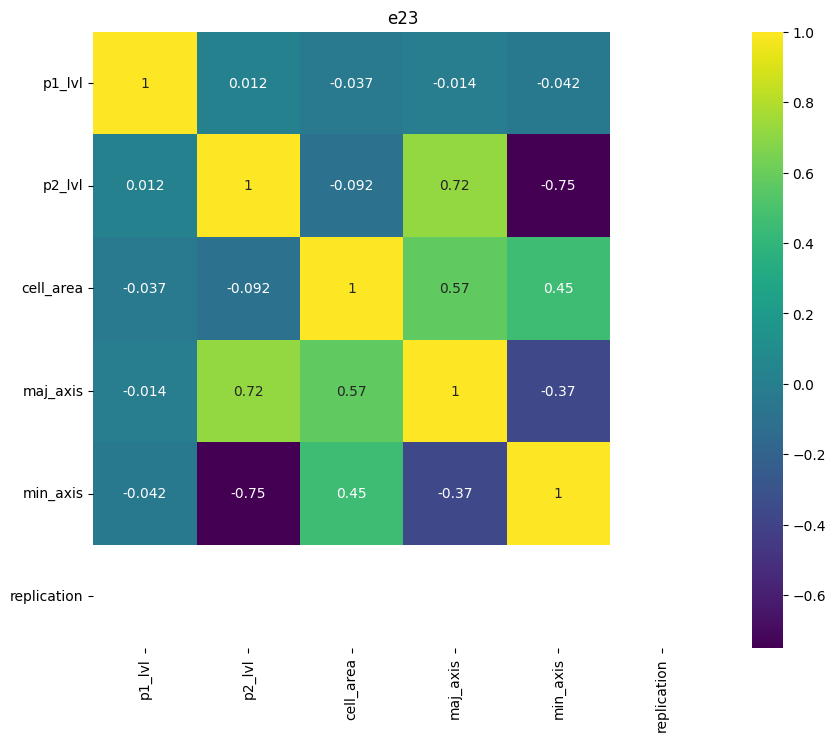

In [ ]:
## correlation under each replication of e2

# Iterate over the unique experimental conditions
for i in df["replication"].value_counts()[df.replication.unique()].keys():

  # Filter dataFrame based on e2 condition
  df1=df[df.condition=='e2']

  # Compute the correlation matrix and plot correlaton Heatmap
  sns.heatmap(df1[df1.replication==i].corr(), annot=True, cmap = 'viridis')

  # Set the figure size and title
  fig=plt.gcf()
  fig.set_size_inches(10,8)
  plt.title("e2"+str(i))

  plt.show() # Display plot


**Inference :**

Here we're trying to see how the data is behaving with each repetition under e2 condition.In this observation we'll be considering only p2 impact on shape as thoase are the only ones having good outcome.

If we observe under each repitition, p2 impact on major stayed same. But the p2 impact on minor has been fluctuating.



<ipython-input-45-2717166e76e7>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[df1.replication==i].corr(), annot=True, cmap = 'viridis')


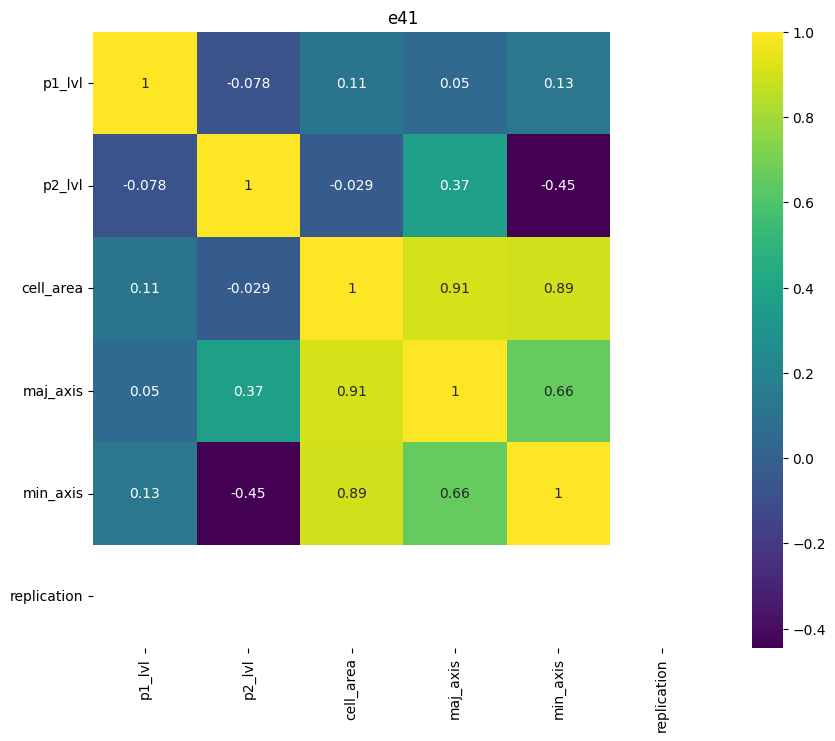

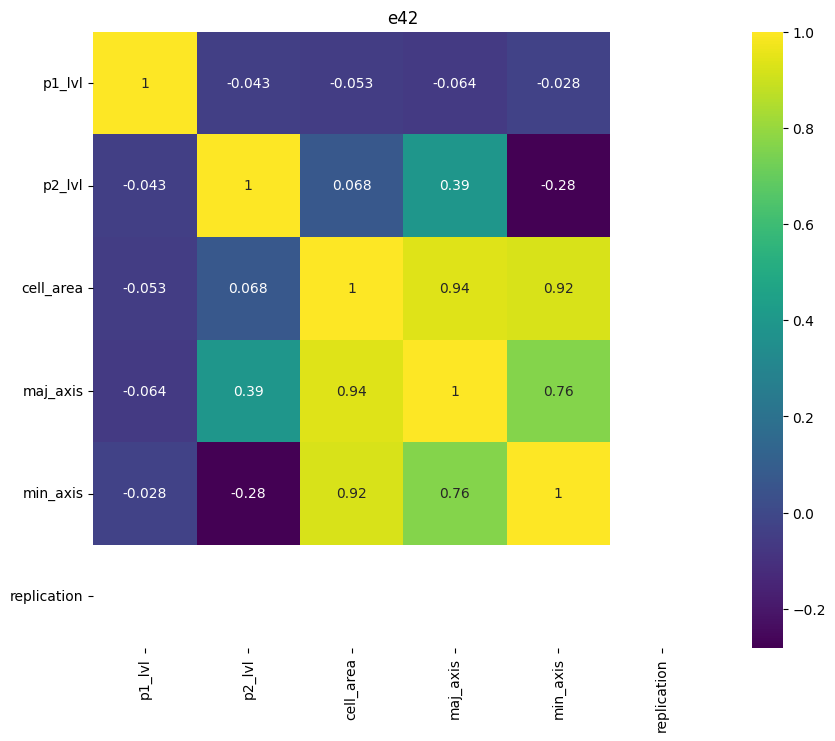

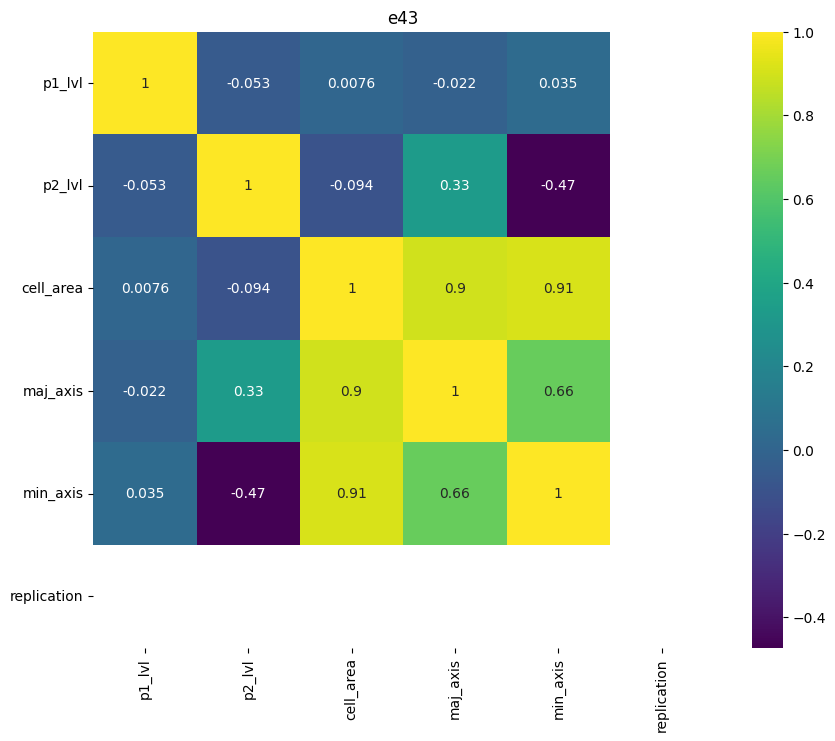

In [ ]:
## correlation under each replications of e4 ( as we have similar results with e0,e1,e4 we've considered one of it)

# Iterate over the unique replications
for i in df["replication"].value_counts()[df.replication.unique()].keys():

  # Filter dataFrame based on e4 condition
  df1=df[df.condition=='e4']

  # Compute the correlation matrix and plot correlaton Heatmap
  sns.heatmap(df1[df1.replication==i].corr(), annot=True, cmap = 'viridis')

  # Set the figure size and title
  fig=plt.gcf()
  fig.set_size_inches(10,8)
  plt.title("e4"+str(i))

  plt.show() # Display plot


**Inference :**

Here we're trying to see how the data is behaving with each repetition under e4 condition.In this observation we'll be considering only p2 impact on shape as thoase are the only ones having good outcome.

Results are pretty much similar to what we inferred in above scenario on e2.

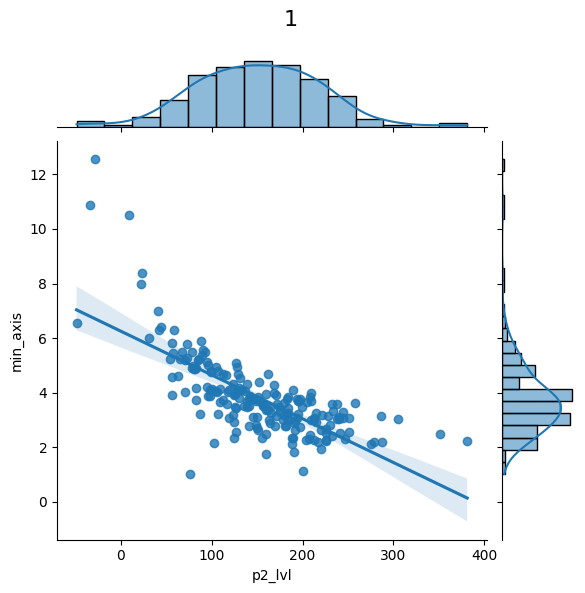

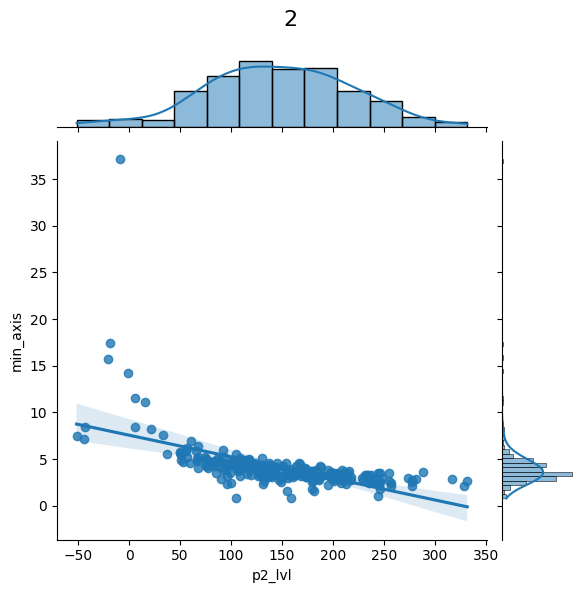

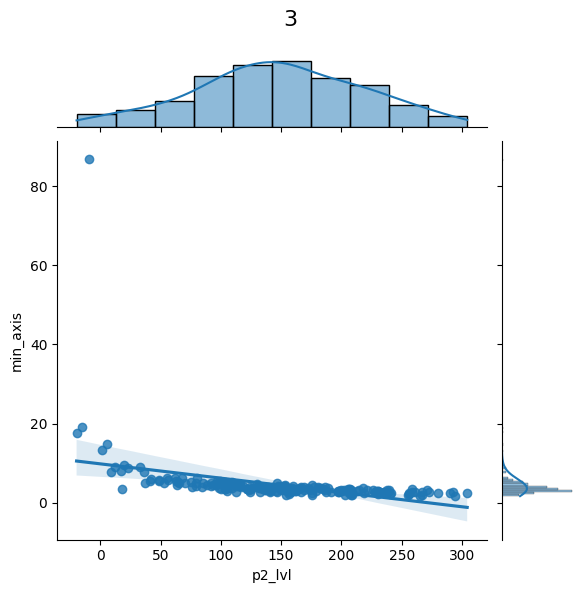

In [ ]:
## p2 impact on minor axis in condition under each repetition of e3 ( as we have similar results with e2,e3 we've considered one of it)

# Iterate over the unique replications
for i in df["replication"].value_counts()[df.replication.unique()].keys():

  # Filter dataFrame based on e3 condition
  df1=df[df.condition=='e3']

  # Create a joint plot for the current condition
  sns.jointplot(x='p2_lvl',y='min_axis',data=df1[df1.replication==i],kind='reg')

  # Adjust the subplots and add centred title
  plt.subplots_adjust(top=0.9)
  plt.suptitle(i, fontsize = 16)


**Inference :**

As we saw fluctuations in p2 impact on minor axis in each condition, we decided to analyse on the reason for fluctuations.
For that we used jointplot between these 2 under each repitition.

As per the graphs we got, we found outliers as the key reason for these fluctuations.

# 2. Statistical Tests

1. **Conducting a linear model analysis for each of the three datasets under all conditions**

linear regression(ols) applied to e0 contains e01,e02,e03

linear regression(ols) applied to e1 contains e11,e12,e13

linear regression(ols) applied to e1 contains e21,e22,e23

linear regression(ols) applied to e1 contains e31,e32,e33

linear regression(ols) applied to e1 contains e41,e42,e43

i) It allows the model to the characteristics and patterns specific to each dataset.So, it can captures unique relationships and variations that may be present in individual datasets.

ii) Test-specific variations may be captured, and you can examine whether the relationships differ across tests.

iii) Smaller sample sizes within each dataset may result in reduced statistical power. It results that the limited ability to detect significant effects or associations due to limited data.

iv) Conducting multiple hypothesis tests (one for each dataset) without correction may increase the risk of making a Type I error.

v)  If multiple models need to be interpreted, it can increase the complexity of the overall analysis. Difficulty in providing a unified interpretation when dealing with multiple models.

2.  **Combining all datasets into a single model and conducting the linear model analysis.**

**Assumptions**

a. Assumes that the relationships and characteristics across datasets are homogenous

b.  The residuals (the differences between observed and predicted values) are normally distributed.

**Advantages**

i) Combining datasets leads to a larger sample size, enhancing statistical power and improving the precision of parameter estimates. Greater ability to detect significant effects and relationships.

ii) Simplifies the analysis by treating all datasets as a single entity, streamlining model development and interpretation. Easier to manage and communicate results.

iii) Estimates of coefficients and other parameters are based on a larger dataset, potentially leading to more reliable and stable results.

**Draw backs**

iv) The combined model may become complex, especially if datasets have different structures or patterns. Challenges in interpreting a complex model and potential overfitting.

v) Outliers in one dataset may disproportionately influence the combined model. Sensitivity to extreme values, potentially affecting the robustness of the analysis.


In [ ]:
df.describe() # Returns description of the data in the DataFrame

,p1_lvl,p2_lvl,cell_area,maj_axis,min_axis,replication
count,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000
mean,311.740225,269.658793,59.790264,7.012926,3.184773,1.993915
std,123.479216,145.441257,20.217504,2.331285,2.535062,0.810376
min,-40.024410,-85.400030,1.391440,0.489870,0.560590,1.000000
25%,236.763385,160.295973,46.033330,5.380665,2.276547,1.000000
50%,300.931940,245.970225,59.601295,6.951340,2.816520,2.000000
75%,368.821860,352.039562,73.545325,8.559145,3.548015,3.000000
max,649.025540,699.673480,125.802950,15.110750,86.944080,3.000000


In [ ]:
def ols(x,y):
  """ Performs an ordinary least squares (OLS) regression on two variables.

  Args:
    x: Independent variable.
    y: Dependent variable.

  """

  # Adds a constant term to independent variable
  X2 = sm.add_constant(x)

  # Creates OLS model
  est = sm.OLS(y, X2)

  # Fits OLS model
  est2 = est.fit()

  print("R-Squared : "+ str(est.fit().rsquared))
  print("\n")
  print(est2.summary())



In [ ]:
## On cell_area

X=df[['p1_lvl','p2_lvl']] # Independent variables
y=df['cell_area'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.0005716013235134154


                            OLS Regression Results                            
Dep. Variable:              cell_area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8450
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.430
Time:                        11:57:07   Log-Likelihood:                -13089.
No. Observations:                2958   AIC:                         2.618e+04
Df Residuals:                    2955   BIC:                         2.620e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61

In [ ]:
## on cell area with each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p1_lvl','p2_lvl']] # Independent variables
  y=df1['cell_area'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 0.00440136126296764


                            OLS Regression Results                            
Dep. Variable:              cell_area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.344
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.262
Time:                        11:57:07   Log-Likelihood:                -2707.3
No. Observations:                 611   AIC:                             5421.
Df Residuals:                     608   BIC:                             5434.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Expression Level of the protein P1**

H0: βP1=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP1≠0 (There is significant relationship between expression level P1 and the cell size)

**Expression Level of the protein P2**

H0: βP2=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP2≠0 (There is significant relationship between expression level P1 and the cell size)

1.  **Condition = e0 (Normal setup (WT) without any modifications)**

For the Expression level of P1 & P2 the p-value was greater than 0.05, so null hypotheses cannot be rejected the relationship between expression level of P1 & P2 with 'Cells' is not statistically significant. But, Expression level of P2 the p-value was slightly near to 0.05, so expression level of P2 and 'Cells' has some relation.

2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

For the Expression level of P1 & P2 the p-value was greater than 0.05, so null hypotheses cannot be rejected the relationship between expression level of P1 & P2 with 'Cells' is not statistically significant. But, Expression level of P1 the p-value was slightly near to 0.05, so expression level of P1 and 'Cells' has some relation.

3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

For the Expression level of P1 & P2 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 & P2 with 'Cells' is not statistically significant.

4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

For the Expression level of P1 & P2 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 & P2 with 'Cells' is not statistically significant.

5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

For the Expression level of P1 & P2 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 & P2 with 'Cells' is not statistically significant.


In [ ]:
## p1 & p2 on major_axis

X=df[['p1_lvl','p2_lvl']] # Independent variables
y=df['maj_axis'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.6595729479514083


                            OLS Regression Results                            
Dep. Variable:               maj_axis   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2863.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:57:07   Log-Likelihood:                -5106.7
No. Observations:                2958   AIC:                         1.022e+04
Df Residuals:                    2955   BIC:                         1.024e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.82

In [ ]:
## p1 & p2 on major_axis under each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p1_lvl','p2_lvl']] # Independent variables
  y=df1['maj_axis'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 0.2764628411349941


                            OLS Regression Results                            
Dep. Variable:               maj_axis   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.89e-43
Time:                        11:57:07   Log-Likelihood:                -1044.3
No. Observations:                 611   AIC:                             2095.
Df Residuals:                     608   BIC:                             2108.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

**Expression Level of the protein P1**

H0: βP1=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP1≠0 (There is significant relationship between expression level P1 and the cell size)

**Expression Level of the protein P2**

H0: βP2=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP2≠0 (There is significant relationship between expression level P1 and the cell size)

1.  **Condition = e0 (Normal setup (WT) without any modifications)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.


2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the p-value was near to 0.05 expression level of P1 & 'major axis' may have slight statistical relation. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.


3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant



4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant



5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.



In [ ]:
## p1 on major_axis

X=df[['p1_lvl']] # Independent variable
y=df['maj_axis'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.08921328749749202


                            OLS Regression Results                            
Dep. Variable:               maj_axis   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     289.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           5.10e-62
Time:                        11:57:07   Log-Likelihood:                -6562.2
No. Observations:                2958   AIC:                         1.313e+04
Df Residuals:                    2956   BIC:                         1.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7

In [ ]:
## p1 on major_axis under each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p1_lvl']] # Independent variables
  y=df1['maj_axis'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 9.523890659746126e-05


                            OLS Regression Results                            
Dep. Variable:               maj_axis   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05801
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.810
Time:                        11:57:07   Log-Likelihood:                -1143.1
No. Observations:                 611   AIC:                             2290.
Df Residuals:                     609   BIC:                             2299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


**Expression Level of the protein P1**

H0: βP1=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP1≠0 (There is significant relationship between expression level P1 and the cell size)

1.  **Condition = e0 (Normal setup (WT) without any modifications)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant



2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the p-value was near to 0.05 expression level of P1 & 'major axis' may have slight statistical relation.



3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant.


4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant.




5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'major axis' is not statistically significant.



In [ ]:
## p2 on major_axis

X=df[['p2_lvl']] # Independent variable
y=df['maj_axis'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.6578878775216196


                            OLS Regression Results                            
Dep. Variable:               maj_axis   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5684.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:57:07   Log-Likelihood:                -5114.0
No. Observations:                2958   AIC:                         1.023e+04
Df Residuals:                    2956   BIC:                         1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.50

In [ ]:
## p2 on major_axis under each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p2_lvl']] # Independent variables
  y=df1['maj_axis'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 0.27611023370510224


                            OLS Regression Results                            
Dep. Variable:               maj_axis   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     232.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.14e-44
Time:                        11:57:07   Log-Likelihood:                -1044.4
No. Observations:                 611   AIC:                             2093.
Df Residuals:                     609   BIC:                             2102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Expression Level of the protein P2**

H0: βP2=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP2≠0 (There is significant relationship between expression level P1 and the cell size)


1.  **Condition = e0 (Normal setup (WT) without any modifications)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.


2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.




3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.


4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant.





5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'major axis' is statistically significant




In [ ]:
## p1 & p2 on minor_axis

X=df[['p1_lvl','p2_lvl']] # Independent variables
y=df['min_axis'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.19996975090308888


                            OLS Regression Results                            
Dep. Variable:               min_axis   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     369.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          6.91e-144
Time:                        11:57:07   Log-Likelihood:                -6618.3
No. Observations:                2958   AIC:                         1.324e+04
Df Residuals:                    2955   BIC:                         1.326e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0

In [ ]:
## p1 & p2 on minor_axis under each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p1_lvl','p2_lvl']] # Independent variables
  y=df1['min_axis'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 0.39690527561649114


                            OLS Regression Results                            
Dep. Variable:               min_axis   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     200.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.73e-67
Time:                        11:57:07   Log-Likelihood:                -442.36
No. Observations:                 611   AIC:                             890.7
Df Residuals:                     608   BIC:                             904.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Expression Level of the protein P1**

H0: βP1=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP1≠0 (There is significant relationship between expression level P1 and the cell size)


**Expression Level of the protein P2**

H0: βP2=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP2≠0 (There is significant relationship between expression level P1 and the cell size)

1.  **Condition = e0 (Normal setup (WT) without any modifications)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.



2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the p-value was near to 0.05 expression level of P1 & 'minor axis' may have slight statistical relation. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.



3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.



4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant




5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant. But the Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.




In [ ]:
## p1 on minor_axis

X=df[['p1_lvl']] # Independent variable
y=df['min_axis'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.02980122683987152


                            OLS Regression Results                            
Dep. Variable:               min_axis   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     90.80
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           3.20e-21
Time:                        11:57:08   Log-Likelihood:                -6903.6
No. Observations:                2958   AIC:                         1.381e+04
Df Residuals:                    2956   BIC:                         1.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0

In [ ]:
## p1 on minor_axis under each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p1_lvl']] # Independent variables
  y=df1['min_axis'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 0.0007881755774573618


                            OLS Regression Results                            
Dep. Variable:               min_axis   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4804
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.489
Time:                        11:57:08   Log-Likelihood:                -596.61
No. Observations:                 611   AIC:                             1197.
Df Residuals:                     609   BIC:                             1206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


**Expression Level of the protein P1**

H0: βP1=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP1≠0 (There is significant relationship between expression level P1 and the cell size)


1.  **Condition = e0 (Normal setup (WT) without any modifications)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant




2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the p-value was near to 0.05 expression level of P1 & 'minor axis' may have slight statistical relation.




3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant.



4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant.





5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

For the Expression level of P1 the p-value was greater than 0.05, so null hypotheses cannot be rejected and the relationship between expression level of P1 with 'minor axis' is not statistically significant.



In [ ]:
## p2 on minor_axis

X=df[['p2_lvl']] # Independent variable
y=df['min_axis'] # Dependent variable

ols(X,y) # Call custom Ordinary Least Sqaues function

R-Squared : 0.19898345388212302


                            OLS Regression Results                            
Dep. Variable:               min_axis   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     734.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.26e-144
Time:                        11:57:08   Log-Likelihood:                -6620.2
No. Observations:                2958   AIC:                         1.324e+04
Df Residuals:                    2956   BIC:                         1.326e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2

In [ ]:
## p2 on minor_axis under each condition

for i in df["condition"].value_counts()[df.condition.unique()].keys():
  df1=df[df.condition==i]
  X=df1[['p2_lvl']] # Independent variables
  y=df1['min_axis'] # Dependent variable
  print('\033[1m'+"condition = "+i+'\033[0m\n')
  ols(X,y) # Call custom Ordinary Least Sqaues function
  print("\n")

condition = e0

R-Squared : 0.39660697903837494


                            OLS Regression Results                            
Dep. Variable:               min_axis   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     400.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           7.98e-69
Time:                        11:57:08   Log-Likelihood:                -442.51
No. Observations:                 611   AIC:                             889.0
Df Residuals:                     609   BIC:                             897.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Expression Level of the protein P2**

H0: βP2=0 (There is no significant linear between expression level P1 and the cell size)

HA: βP2≠0 (There is significant relationship between expression level P1 and the cell size)

1.  **Condition = e0 (Normal setup (WT) without any modifications)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.


2.  **Condition = e1 (The expression levels of the protein P1 were reduced while keeping that of P2 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.



3.  **Condition = e2 (The expression levels of the protein P2 were reduced while keeping that of P1 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.



4.  **Condition = e3 (The expression levels of the protein P1 were increased while keeping that of P2 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant.

5. **Condition = e4 (The expression levels of the protein P2 were increased while keeping that of P1 intact)**

The Expression level of P2 the p-value was less than 0.05, so null hypotheses can be rejected and the relationship between expression level of P2 with 'minor axis' is statistically significant



# 3. Final Inference


*   Both p1 and p2 are not having much direct impact on size (cell area).
*   P1 having no much direct impact on shape (major and minor axis).
*   P2 holds key, having more impact on shape.
>*   On combined data, it almost has high positive correlation on major axis and close to mid negative correlation on minor axis.
>*   On major axis, p2 is having almost high positive correlation for conditions e2x, e3x ( either reducing p2 or increasing p1 ) . For remaining 3 it's showing close to mid positive correlation.
>*   On minor axis, p2 has close to mid negative correlation.
>*   Impact during replication :
>>*    On major axis, it's almost same in all replications.
>>*    On minor axis, values are unstabe due to outliers.


# **Suggesting changes in experimental methodology.**

since,P1 has not direct impact on **size and shape** we can neglect this effect. so that input dimensionality reduces without being lost the accuracy and computation becomes easier.

minor axis values are unstable in replications due to outliers, its better to record the minor axis values without been so many outliers